In [19]:
import numpy as np
import pandas as pd
import pickle

In [2]:
# Raw data
features = pd.read_csv('../Data/FormattedTraining/ShadowVideosPhotosAugmented2/data.csv')
labels = pd.read_csv('../Data/FormattedTraining/ShadowVideosPhotosAugmented2/target.csv')
# Even spread of boxing vs non boxing (1-2)
#features = pd.read_csv('../Data/FormattedTraining/ShadowVideos/data_even.csv')
#labels = pd.read_csv('../Data/FormattedTraining/ShadowVideos/target_even.csv')
feature_names = pd.read_csv('../Data/FormattedTraining/ShadowVideosPhotosAugmented2/feature_names.csv')
label_names = ['Boxing','Not Boxing']

labels = np.ravel(labels.as_matrix(columns=None))
feature_names = np.ravel(feature_names.as_matrix(columns=None))
features = features.as_matrix(columns=None)
type(features)

numpy.ndarray

In [3]:
print(labels.shape)
print(feature_names.shape)
print(features.shape)
feature_names

(1179295,)
(51,)
(1179295, 51)


array(['Pelvis_x', 'R_Hip_x', 'R_Leg_x', 'R_Foot_x', 'L_Hip_x', 'L_Leg_x',
       'L_Foot_x', 'Belly_x', 'Thorax_x', 'Neck_x', 'Head_x',
       'L_Shoulder_x', 'L_Arm_x', 'L_Hand_x', 'R_Shoulder_x', 'R_Arm_x',
       'R_Hand_x', 'Pelvis_y', 'R_Hip_y', 'R_Leg_y', 'R_Foot_y', 'L_Hip_y',
       'L_Leg_y', 'L_Foot_y', 'Belly_y', 'Thorax_y', 'Neck_y', 'Head_y',
       'L_Shoulder_y', 'L_Arm_y', 'L_Hand_y', 'R_Shoulder_y', 'R_Arm_y',
       'R_Hand_y', 'Pelvis_z', 'R_Hip_z', 'R_Leg_z', 'R_Foot_z', 'L_Hip_z',
       'L_Leg_z', 'L_Foot_z', 'Belly_z', 'Thorax_z', 'Neck_z', 'Head_z',
       'L_Shoulder_z', 'L_Arm_z', 'L_Hand_z', 'R_Shoulder_z', 'R_Arm_z',
       'R_Hand_z'], dtype=object)

In [4]:
# Look at our data
print(label_names)
print(labels[0])
print(feature_names[0])
print(features[0])

['Boxing', 'Not Boxing']
1
Pelvis_x
[ 122.     -63.588   17.062  188.94   310.96   409.72   371.24    98.658
   99.22    84.662  100.32   388.79   481.29   433.59  -194.58  -406.78
 -269.24   153.08   122.05  -331.87  -418.68   195.62  -253.98  -422.21
  186.26   132.12    39.25    76.775  186.46   219.64    58.649  124.93
  164.91   -24.084  -34.884  -51.447   76.199 -172.48   -18.324  122.95
 -167.54    61.441  124.75   213.98   300.78   116.91   -84.036 -171.65
   92.047 -419.57  -309.32 ]


In [5]:
from sklearn.model_selection import train_test_split

# Split our data
train, test, train_labels, test_labels = train_test_split(features,
                                                          labels,
                                                          test_size=0.05)

In [13]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(40, 30, 20, 15, 10, 5, 2), learning_rate= 'adaptive', random_state=1, verbose=True)
clf.fit(train, train_labels)

Iteration 1, loss = 0.39553307
Iteration 2, loss = 0.23437865
Iteration 3, loss = 0.19615568
Iteration 4, loss = 0.18529257
Iteration 5, loss = 0.17806187
Iteration 6, loss = 0.17446527
Iteration 7, loss = 0.17026339
Iteration 8, loss = 0.16644692
Iteration 9, loss = 0.16291283
Iteration 10, loss = 0.16052583
Iteration 11, loss = 0.15845580
Iteration 12, loss = 0.15947562
Iteration 13, loss = 0.15781464
Iteration 14, loss = 0.15651258
Iteration 15, loss = 0.15828915
Iteration 16, loss = 0.15650158
Iteration 17, loss = 0.15379696
Iteration 18, loss = 0.15253121
Iteration 19, loss = 0.15295822
Iteration 20, loss = 0.15102759
Iteration 21, loss = 0.14995518
Iteration 22, loss = 0.14998710
Iteration 23, loss = 0.14895484
Iteration 24, loss = 0.14826343
Iteration 25, loss = 0.14722951
Iteration 26, loss = 0.14709617
Iteration 27, loss = 0.14630517
Iteration 28, loss = 0.14684979
Iteration 29, loss = 0.14587811
Iteration 30, loss = 0.14544758
Iteration 31, loss = 0.14644859
Iteration 32, los

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(40, 30, 20, 15, 10, 5, 2),
       learning_rate='adaptive', learning_rate_init=0.001, max_iter=200,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5, random_state=1,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [14]:
# Make predictions
preds = clf.predict(test)

In [20]:
# save the model to disk
filename = 'classifier_box_nonBox2.sav'
pickle.dump(clf, open(filename, 'wb'))

In [15]:
np.sum(test_labels)/test_labels.shape[0]
test_boxing = test_labels[np.where(test_labels==1)]
test_nonboxing = test_labels[np.where(test_labels==0)]
features_boxing = features[np.where(test_labels==1)][:]
print(test_boxing.shape)
print(test_nonboxing.shape)

(17528,)
(41437,)


In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Evaluate accuracy
print('Accuracy = {}'.format(accuracy_score(test_labels, preds)))
# Evaluate precision
#print('Precision = {}'.format(precision_score(test_labels, preds)))
# Evaluate recall
print('Recall = {}'.format(recall_score(test_labels, preds)))
# Evaluate f1
print('f1 score = {}'.format(f1_score(test_labels, preds)))

Accuracy = 0.951818875604172
Recall = 0.8975353719762665
f1 score = 0.9171840839527766


In [17]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(test_labels,preds))

[[40392  1045]
 [ 1796 15732]]


In [11]:
print(classification_report(test_labels,preds))

             precision    recall  f1-score   support

          0       0.96      0.97      0.96     41437
          1       0.92      0.90      0.91     17528

avg / total       0.95      0.95      0.95     58965



Iteration 1, loss = 0.53041625
Iteration 2, loss = 0.32276203
Iteration 3, loss = 0.29094817
Iteration 4, loss = 0.27553817
Iteration 5, loss = 0.26431225
Iteration 6, loss = 0.25591390
Iteration 7, loss = 0.24828491
Iteration 8, loss = 0.24297173
Iteration 9, loss = 0.23926080
Iteration 10, loss = 0.23512349
Iteration 11, loss = 0.24215767
Iteration 12, loss = 0.23232746
Iteration 13, loss = 0.22751700
Iteration 14, loss = 0.21986920
Iteration 15, loss = 0.21220865
Iteration 16, loss = 0.20866918
Iteration 17, loss = 0.20478412
Iteration 18, loss = 0.20480723
Iteration 19, loss = 0.20266644
Iteration 20, loss = 0.19947807
Iteration 21, loss = 0.19955661
Iteration 22, loss = 0.19441159
Iteration 23, loss = 0.19279965
Iteration 24, loss = 0.19131686
Iteration 25, loss = 0.19114199
Iteration 26, loss = 0.18904936
Iteration 27, loss = 0.18746887
Iteration 28, loss = 0.18690375
Iteration 29, loss = 0.18529853
Iteration 30, loss = 0.18375922
Iteration 31, loss = 0.18228438
Iteration 32, los

Iteration 21, loss = 0.14672461
Iteration 22, loss = 0.14475549
Iteration 23, loss = 0.14466879
Iteration 24, loss = 0.14348484
Iteration 25, loss = 0.14293767
Iteration 26, loss = 0.14202187
Iteration 27, loss = 0.14196076
Iteration 28, loss = 0.14071513
Iteration 29, loss = 0.14053712
Iteration 30, loss = 0.14054619
Iteration 31, loss = 0.13996065
Iteration 32, loss = 0.14010322
Iteration 33, loss = 0.13856622
Iteration 34, loss = 0.13813228
Iteration 35, loss = 0.13751578
Iteration 36, loss = 0.13694942
Iteration 37, loss = 0.13724371
Iteration 38, loss = 0.13659958
Iteration 39, loss = 0.13609733
Iteration 40, loss = 0.13594433
Iteration 41, loss = 0.13588600
Iteration 42, loss = 0.13505134
Iteration 43, loss = 0.13477674
Iteration 44, loss = 0.13532775
Iteration 45, loss = 0.13388400
Iteration 46, loss = 0.13388548
Iteration 47, loss = 0.13406401
Iteration 48, loss = 0.13417465
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, 

Iteration 42, loss = 0.13667279
Iteration 43, loss = 0.13558704
Iteration 44, loss = 0.13554388
Iteration 45, loss = 0.13509543
Iteration 46, loss = 0.13537234
Iteration 47, loss = 0.13419602
Iteration 48, loss = 0.13361654
Iteration 49, loss = 0.13405646
Iteration 50, loss = 0.13381697
Iteration 51, loss = 0.13318453
Iteration 52, loss = 0.13248674
Iteration 53, loss = 0.13266358
Iteration 54, loss = 0.13202332
Iteration 55, loss = 0.13205913
Iteration 56, loss = 0.13176157
Iteration 57, loss = 0.13138649
Iteration 58, loss = 0.13144359
Iteration 59, loss = 0.13157510
Iteration 60, loss = 0.13158674
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.44057116
Iteration 2, loss = 0.31423042
Iteration 3, loss = 0.28311882
Iteration 4, loss = 0.26459478
Iteration 5, loss = 0.25464412
Iteration 6, loss = 0.24387377
Iteration 7, loss = 0.23885826
Iteration 8, loss = 0.23227399
Iteration 9, loss = 0.22708789
Iteration 10, loss = 0

Iteration 23, loss = 0.14402080
Iteration 24, loss = 0.14406493
Iteration 25, loss = 0.14576256
Iteration 26, loss = 0.14221598
Iteration 27, loss = 0.14185273
Iteration 28, loss = 0.14252615
Iteration 29, loss = 0.14109228
Iteration 30, loss = 0.14074714
Iteration 31, loss = 0.14069352
Iteration 32, loss = 0.13989409
Iteration 33, loss = 0.13983687
Iteration 34, loss = 0.13913781
Iteration 35, loss = 0.13902212
Iteration 36, loss = 0.13920844
Iteration 37, loss = 0.13825105
Iteration 38, loss = 0.13727984
Iteration 39, loss = 0.13734571
Iteration 40, loss = 0.13809591
Iteration 41, loss = 0.13716836
Iteration 42, loss = 0.13616879
Iteration 43, loss = 0.13590111
Iteration 44, loss = 0.13604078
Iteration 45, loss = 0.13557647
Iteration 46, loss = 0.13531926
Iteration 47, loss = 0.13512785
Iteration 48, loss = 0.13467087
Iteration 49, loss = 0.13438947
Iteration 50, loss = 0.13377485
Iteration 51, loss = 0.13367593
Iteration 52, loss = 0.13334059
Iteration 53, loss = 0.13323813
Iteratio

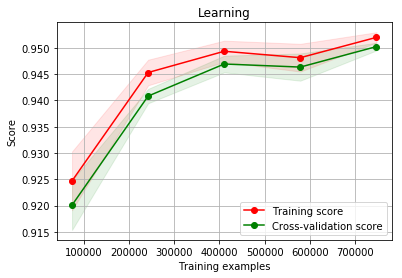

In [12]:
#plot Learning curve
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import learning_curve
plt.figure()
plt.title('Learning')
ylim = None
if ylim is not None:
    plt.ylim(*ylim)
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(
    clf, train, train_labels, cv=None, n_jobs=1, train_sizes=np.linspace(0.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")

In [1]:
test.shape

NameError: name 'test' is not defined